# netCDFファイルの内容確認

ERA5 monthly data download
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form

海流　月平均データ download
https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_001_030/files?subdataset=cmems_mod_glo_phy_my_0.083_P1M-m_202112

## 風データ

データ取得

In [2]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import netCDF4
import polars as pl

year = 2016

nc = netCDF4.Dataset("era5_testdata" + str(year) + ".nc","r")
nc_var = nc.variables.keys()
print(nc_var)

dict_keys(['longitude', 'latitude', 'time', 'u10', 'v10'])


netCDFファイルからのデータ抽出

In [10]:
data_lon = nc.variables["longitude"][:]
data_lat = nc.variables["latitude"][:]
data_t = nc.variables["time"][:]
data_u10 = nc.variables["u10"][:]
data_v10 = nc.variables["v10"][:]

In [11]:
print(data_t[-1])

1024872


netCDFファイルのデータをcsvファイルに変換する

ERA5データ

フルデータのリスト化

In [12]:
latdata = []
londata = []
timedata = []
u10data = []
v10data = []

for i in range(len(data_t)):
    for j in range(len(data_lat)):
        for k in range(len(data_lon)):

            latdata.append(data_lat[j])
            londata.append(data_lon[k])
            timedata.append(data_t[i])
            u10data.append(data_u10[i][j][k])
            v10data.append(data_v10[i][j][k])

#data = pl.DataFrame({"TIME[month]":timedata,"LAT":latdata,"LON":londata,"U10_E+_W-[m/s]":u10data,"V10_N+_S-[m/s]":v10data})

#data.write_csv('wind_datas/era5_testdata_E180W90S0W90_2016.csv')

フルデータリストのcsv化処理

In [13]:
startyear = year

years = 1

data_num = 0

for i in range(years):
    year = startyear + i

    
    
    for j in range(12):
        month = 1 + j

        yeardata = []
        monthdata = []
        latdata_year = []
        londata_year = []
        u10data_year = []
        v10data_year = []

        for k in range(len(data_lat)*len(data_lon)):

            yeardata.append(year)
            monthdata.append(month)
            latdata_year.append(latdata[data_num])
            londata_year.append(londata[data_num])
            u10data_year.append(u10data[data_num])
            v10data_year.append(v10data[data_num])

            data_num = data_num + 1
    
        data = pl.DataFrame({"YEAR":yeardata,"MONTH":monthdata,"LAT":latdata_year,"LON":londata_year,"U10_E+_W-[m/s]":u10data_year,"V10_N+_S-[m/s]":v10data_year})

        data.write_csv('wind_datas/era5_testdata_E180W90S0N90_'+str(year)+'_'+str(month)+'.csv')

print(data_num)          

1563852


In [ ]:
latdata = []
londata = []
timedata = []
u10data = []
v10data = []

for i in range(len(data_t)):
    for j in range(len(data_lat)):
        for k in range(len(data_lon)):

            latdata.append(data_lat[j])
            londata.append(data_lon[k])
            timedata.append(data_t[i])
            u10data.append(data_u10[i][j][k])
            v10data.append(data_v10[i][j][k])

data = pl.DataFrame({"TIME[month]":timedata,"LAT":latdata,"LON":londata,"U10_E+_W-[m/s]":u10data,"V10_N+_S-[m/s]":v10data})

data.write_csv('era5_testdata_E180W90S0N90_2017-2022.csv')

## 海流データ

データの取得と列名確認

In [ ]:
import netCDF4 as cdf4
kairyudata1 = cdf4.Dataset("cmems_mod_glo_phy_my_0.083_P1D-m")

kairyudata1 = cdf4.Dataset("kairyudata_mean_202010.nc","r")
kairyudata1_var = kairyudata1.variables.keys()
print(kairyudata1_var)

取得データのcsv化処理

In [12]:
import netCDF4 as cdf4
import numpy as np
import polars as pl


depth_num = 13 #深度25mくらい

for i1 in range(5):
    year = 2016 + i1

    for j1 in range(12):
        month = 1 + j1
        month_name = str(month).zfill(2)

        kairyudata = cdf4.Dataset("kairyu" + str(year) + "/mercatorglorys12v1_gl12_mean_" + str(year) + str(month_name) + ".nc","r")

        data_lon = kairyudata1.variables["longitude"][:]
        data_lat = kairyudata1.variables["latitude"][:]
        data_t = kairyudata1.variables["time"][:]
        data_uo = kairyudata1.variables["uo"][:]
        data_vo = kairyudata1.variables["vo"][:]
        data_usi = kairyudata1.variables["usi"][:]
        data_d = kairyudata1.variables["depth"][:]

        uo_data = []
        vo_data = []
        lat_data = []
        lon_data = []

        for i in range(len(data_lat)):
            for j in range(len(data_lon)):
                uo_data.append(data_uo[0][depth_num][i][j])
                vo_data.append(data_vo[0][depth_num][i][j])
                lat_data.append(data_lat[i])
                lon_data.append(data_lon[j])
        
        depth = data_d[depth_num]

        data = pl.DataFrame({"LAT":lat_data,"LON":lon_data,"U10_E+_W-[m/s]":uo_data,"V10_N+_S-[m/s]":vo_data})

        data = data.filter((pl.col("LAT") >= 0) & (pl.col("LON") >= 90) & (np.mod(pl.col("LAT"),0.25) == 0) & (np.mod(pl.col("LON"),0.25) == 0))

        data.write_csv('kairyu_datas/kairyu_testdata_E180W90S0N90_' + str(depth) + 'm_' + str(year) + '_' + str(month) + '.csv')
                

/home/ebihara/.local/lib/python3.10/site-packages/polars/utils/_construction.py:521: UserWarning: Warning: converting a masked element to nan.
  return PySeries.new_from_anyvalues(name, values, strict)


## 海流データと風データの統合

In [25]:
depth = 25.21141


start_year = 2016
year_num = 5

for y in range(year_num):
    year = start_year + y

    for m in range(12):
        month = 1 + m


        kairyu_data = pl.read_csv("kairyu_datas/kairyu_testdata_E180W90S0W90_" + str(depth) + "m_" + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")
        wind_data = pl.read_csv("wind_datas/era5_testdata_E180W90S0W90_" + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")

        u_wind = []
        v_wind = []
        errornum = 0


        for i in range(len(kairyu_data)):
            lat = kairyu_data[i,"LAT"]
            lon = kairyu_data[i,"LON"]
            data = wind_data.filter((pl.col("LAT") == lat) & (pl.col("LON") == lon))
            
            if len(data) == 1:
                u_wind.append(data[0,"U10_E+_W-[m/s]"])
                v_wind.append(data[0,"V10_N+_S-[m/s]"])
            else:
                u_wind.append(np.nan)
                v_wind.append(np.nan)
                errornum = errornum + 1

        wind_and_kairyu_data = kairyu_data.with_columns(pl.Series(u_wind).alias("wind_U_E+_W-[m/s]"))
        wind_and_kairyu_data = wind_and_kairyu_data.with_columns(pl.Series(v_wind).alias("wind_V_N+_S-[m/s]"))
        wind_and_kairyu_data = wind_and_kairyu_data.select(pl.col("LAT"),pl.col("LON"),pl.col("wind_U_E+_W-[m/s]"),pl.col("wind_V_N+_S-[m/s]"),pl.col("U10_E+_W-[m/s]").alias("ocean_U_E+_W-[m/s]"), pl.col("V10_N+_S-[m/s]").alias("ocean_V_N+_S-[m/s]"))
        wind_and_kairyu_data.write_csv('wind&kairyu_datas/wind_and_kairyu_testdata_E180W90S0W90_' + str(year) + '_' + str(month) + '.csv')

        if errornum > 0:
            print(year,month,errornum)



海流と風のなす角の追加

In [36]:
from numpy import linalg as LA
depth = 25.21141


start_year = 2016
year_num = 5

for y in range(year_num):
    year = start_year + y

    for m in range(12):
        month = 1 + m


        wind_and_kairyu_data = pl.read_csv("wind&kairyu_datas/wind_and_kairyu_testdata_E180W90S0W90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")
        

        wind_kairyu_deg = []


        for i in range(len(wind_and_kairyu_data)):
            wind_vec = np.array([wind_and_kairyu_data[i,"wind_U_E+_W-[m/s]"],wind_and_kairyu_data[i,"wind_V_N+_S-[m/s]"]])
            kairyu_vec = np.array([wind_and_kairyu_data[i,"ocean_U_E+_W-[m/s]"],wind_and_kairyu_data[i,"ocean_V_N+_S-[m/s]"]])
            i = np.inner(wind_vec, kairyu_vec)
            n = LA.norm(wind_vec) * LA.norm(kairyu_vec)
            if n != 0 :
                c = i / n
                deg = np.rad2deg(np.arccos(np.clip(c, -1.0, 1.0)))
            else:
                deg = np.nan

            wind_kairyu_deg.append(deg)

        wind_and_kairyu_data = wind_and_kairyu_data.with_columns(pl.Series(wind_kairyu_deg).alias("ocean_wind_deg_N=0[deg]"))
        
        wind_and_kairyu_data.write_csv('wind&kairyu_datas/wind_and_kairyu_testdata_E180W90S0W90_' + str(year) + '_' + str(month) + '.csv')


対水速度の計算関数の定義

In [1]:
def ship_speed_cal_from_lift(wind_speed,angle_deg):
    #定数定義
    Lift_coefficent = 1 #風速2乗を入力として揚力を出力する係数　N/((m/s)^2)

    Lift = Lift_coefficent*(wind_speed**2)
    trust_power = Lift*np.cos(np.deg2rad(90-angle_deg))

    #船速計算用定数定義
    ship_speed_coefficent = 2 #船型対応で推力を入力として船速を出力する係数　(m/s)/N

    ship_speed = ship_speed_coefficent*trust_power

    return ship_speed #m/s

def ship_speed_cal_from_drag(wind_speed,angle_deg):
    #定数定義
    Drag_cofficent = 1 #風速2乗を入力として抗力を出力する係数　N/((m/s)^2)

    Drag = Drag_cofficent*(wind_speed**2)
    trust_power = Drag*(np.cos(np.deg2rad(180-angle_deg)))

    #船速計算用定数定義
    ship_speed_coefficent = 1 #船型対応で推力を入力として船速を出力する係数　(m/s)/N

    ship_speed = ship_speed_coefficent*trust_power

    return ship_speed #m/s







対水速度の計算ならびにデータ追加

In [2]:
from numpy import linalg as LA
import polars as pl
import numpy as np
depth = 25.21141


start_year = 2016
year_num = 5

for y in range(year_num):
    year = start_year + y

    for m in range(12):
        month = 1 + m


        wind_and_kairyu_data = pl.read_csv("wind&kairyu_datas/wind_and_kairyu_testdata_E180W90S0W90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")
        wind_and_kairyu_data = wind_and_kairyu_data.select(pl.col("LAT"),pl.col("LON"),pl.col("wind_U_E+_W-[m/s]"),pl.col("wind_V_N+_S-[m/s]"),pl.col("ocean_U_E+_W-[m/s]"), pl.col("ocean_V_N+_S-[m/s]"),pl.col("ocean_wind_deg_N=0[deg]"))
        wind_and_kairyu_data = wind_and_kairyu_data = wind_and_kairyu_data.filter(pl.col("LON") >= 120)
        taisui_list = []


        for i in range(len(wind_and_kairyu_data)):
            angle_deg = wind_and_kairyu_data[i,"ocean_wind_deg_N=0[deg]"]
            wind_vec = np.array([wind_and_kairyu_data[i,"wind_U_E+_W-[m/s]"],wind_and_kairyu_data[i,"wind_V_N+_S-[m/s]"]])
            wind_speed = LA.norm(wind_vec)
            kairyu_vec = np.array([wind_and_kairyu_data[i,"ocean_U_E+_W-[m/s]"],wind_and_kairyu_data[i,"ocean_V_N+_S-[m/s]"]])
            kairyu_speed = LA.norm(kairyu_vec)

            #揚力の場合
            if ((angle_deg >= 60)&(angle_deg <= 90)):
                ship_speed = ship_speed_cal_from_lift(wind_speed,angle_deg)
                taisui_speed = ship_speed + kairyu_speed*5
            
            #抗力の場合
            elif ((angle_deg >= 150)&(angle_deg <= 180)):
                ship_speed = ship_speed_cal_from_drag(wind_speed,angle_deg)
                taisui_speed = ship_speed + kairyu_speed*5
            
            #海流と反対方向に進めない場合
            else:
                taisui_speed = 0.0
                
            
            taisui_list.append(taisui_speed)
            
            

        wind_and_kairyu_data = wind_and_kairyu_data.with_columns(pl.Series(taisui_list).alias("taisui_speed[m/s]"))
        
        wind_and_kairyu_data.write_csv('wind&kairyu_datas/wind_and_kairyu_testdata_E180W120S0N90_' + str(year) + '_' + str(month) + '.csv')


矢印を書く用のデータ数を減らしたデータ作成

In [3]:
from numpy import linalg as LA
import polars as pl
import numpy as np
depth = 25.21141


start_year = 2016
year_num = 5

for y in range(year_num):
    year = start_year + y

    for m in range(12):
        month = 1 + m


        wind_and_kairyu_data = pl.read_csv("wind&kairyu_datas/wind_and_kairyu_testdata_E180W120S0N90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")
        
        for i in range(len(wind_and_kairyu_data)):
            wind_and_kairyu_data = wind_and_kairyu_data.filter(pl.col("LON") >= 120)
            wind_and_kairyu_data = wind_and_kairyu_data.filter((np.mod(pl.col("LAT"),1.0) == 0) & (np.mod(pl.col("LON"),1.0) == 0))
            
        
        wind_and_kairyu_data.write_csv('wind_kairyu_draw_data/wind_and_kairyu_testdata_E180W120S0N90_' + str(year) + '_' + str(month) + '.csv')


In [6]:
from numpy import linalg as LA
import polars as pl
import numpy as np
depth = 25.21141


start_year = 2016
year_num = 5

for y in range(year_num):
    year = start_year + y

    for m in range(12):
        month = 1 + m


        wind_and_kairyu_data = pl.read_csv('wind_kairyu_draw_data/wind_and_kairyu_testdata_E180W120S0N90_' + str(year) + '_' + str(month) + '.csv',encoding="shift-jis")
        
        for i in range(len(wind_and_kairyu_data)):
            #wind_and_kairyu_data = wind_and_kairyu_data.filter(pl.col("LON") >= 120)
            wind_and_kairyu_data = wind_and_kairyu_data.filter((np.mod(pl.col("LAT"),2.0) == 0) & (np.mod(pl.col("LON"),1.0) == 0))
            
        
        wind_and_kairyu_data.write_csv('wind_kairyu_draw_data/wind_and_kairyu_testdata_E180W120S0N90_' + str(year) + '_' + str(month) + '.csv')


### 海流＆風の描画

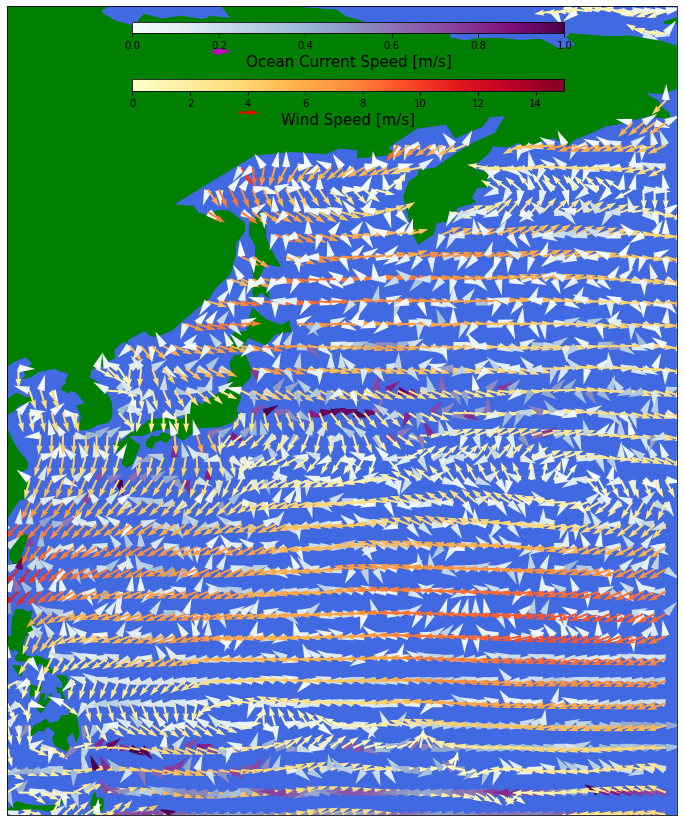

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import math

year = 2019
month = 11

wind_and_kairyu_data = pl.read_csv("wind_kairyu_draw_data/wind_and_kairyu_testdata_E180W120S0N90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")

#データサイズがでかいので分割が必要となった
lon = wind_and_kairyu_data[:]['LON'] # 経度データ読み込み
lat = wind_and_kairyu_data[:]['LAT'] # 緯度データ読み込み
wind_u = wind_and_kairyu_data[:]["wind_U_E+_W-[m/s]"]
wind_v = wind_and_kairyu_data[:]["wind_V_N+_S-[m/s]"]
kairyu_u = wind_and_kairyu_data[:]["ocean_U_E+_W-[m/s]"]
kairyu_v = wind_and_kairyu_data[:]["ocean_V_N+_S-[m/s]"]

#x, y = np.meshgrid(lon, lat) # ２次元の経度・緯度座標の準備
#wind_u, wind_v = np.meshgrid(wind_u, wind_v) # ２次元の経度・緯度座標の準備


import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し
size = 10

ax.add_feature(cfeature.LAND, color='g') # 陸を緑色で塗り潰す
ax.add_feature(cfeature.OCEAN, color='royalblue') # 海を水色で塗り潰す
ax.set_extent([120, 180, 0, 70], ccrs.Geodetic())
#ax.set_extent([160, 180, 50, 70], ccrs.Geodetic())

for i in range(len(lat)):
    if not math.isnan(kairyu_u[i]):
        #海流矢印表示
        size = 10
        vec_size = (np.sqrt((kairyu_u[i])**2 + (kairyu_v[i])**2))
        Q_kairyu = ax.quiver(lon[i], lat[i], kairyu_u[i]/vec_size*size, kairyu_v[i]/vec_size*size, vec_size,cmap = 'BuPu', clim = (0,1), headlength=6 , headaxislength=6, width=.004, scale=400.)
        
        #風矢印表示
        size = 12
        vec_size = (np.sqrt((wind_u[i])**2 + (wind_v[i])**2))
        Q_wind = ax.quiver(lon[i], lat[i], wind_u[i]/vec_size*size, wind_v[i]/vec_size*size, vec_size,cmap = 'YlOrRd', clim = (0,15), width=.003, scale=400.)
        
    

#海流カラーバー表示
ax.quiverkey(Q_kairyu, 0.32, 0.945, size, '', color='m', labelsep=0.03)
cax = fig.add_axes([0.27, 0.83, 0.5, 0.01])
fig.colorbar(Q_kairyu, cax=cax, orientation="horizontal").set_label("Ocean Current Speed [m/s]",size=15)

#風カラーバー表示
ax.quiverkey(Q_wind, 0.36, 0.87, size, '', color='r', labelsep=0.03)
cax = fig.add_axes([0.27, 0.78, 0.5, 0.01])
fig.colorbar(Q_wind, cax=cax, orientation="horizontal").set_label("Wind Speed [m/s]",size=15)


### 対水速度のみの描画

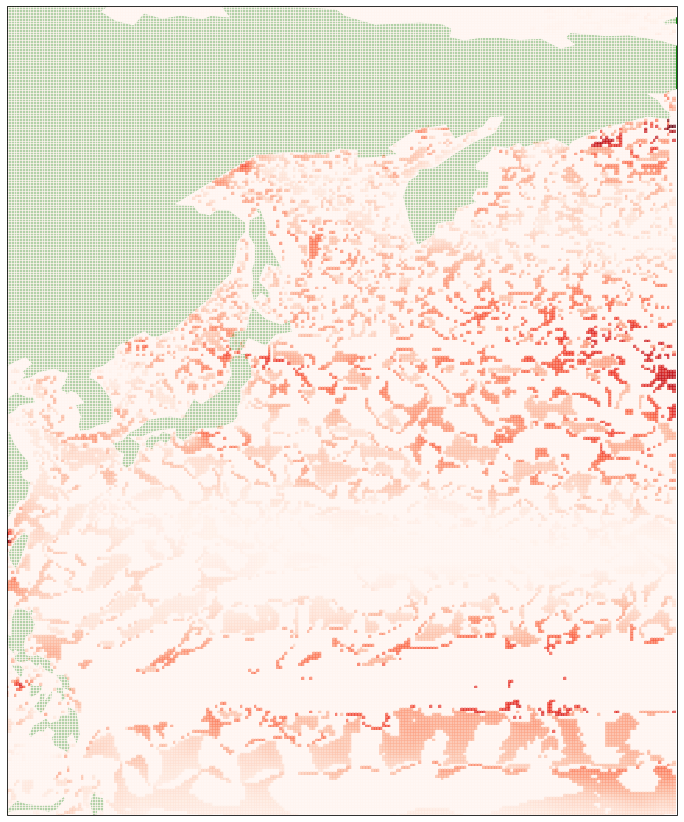

In [1]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import math


year = 2016
month = 1
wind_and_kairyu_data = pl.read_csv("wind&kairyu_datas/wind_and_kairyu_testdata_E180W120S0N90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")

lon = wind_and_kairyu_data[:]['LON'] # 経度データ読み込み
lat = wind_and_kairyu_data[:]['LAT'] # 緯度データ読み込み
point = wind_and_kairyu_data[:]["taisui_speed[m/s]"]

#対水速度サーモグラフ作成用行列化
list = []
for i in range(len(point)):
    list.append(point[i])

point = np.array(list)

lat_data_num = wind_and_kairyu_data.select(pl.col('LAT').n_unique())[0,0]
d_lat = (max(lat)-min(lat))/(lat_data_num-1)
lon_data_num = wind_and_kairyu_data.select(pl.col('LON').n_unique())[0,0]
d_lon = (max(lon)-min(lon))/(lon_data_num-1)

lat,lon = np.mgrid[min(lat):max(lat)+d_lat:d_lat, min(lon):max(lon)+d_lon:d_lon]
point = point.reshape([lat_data_num,lon_data_num])

#描画開始
fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し




max_p = max(list)
min_p = min(list)
ax.pcolor(lon,lat,point, cmap = 'Reds',alpha=0.7)
ax.add_feature(cfeature.LAND, color='g',alpha=1.0) # 陸を緑色で塗り潰す
ax.add_feature(cfeature.OCEAN, color='w') # 海を水色で塗り潰す
ax.set_extent([120, 180, 0, 70], ccrs.Geodetic())


### 海流＆風＆対水速度

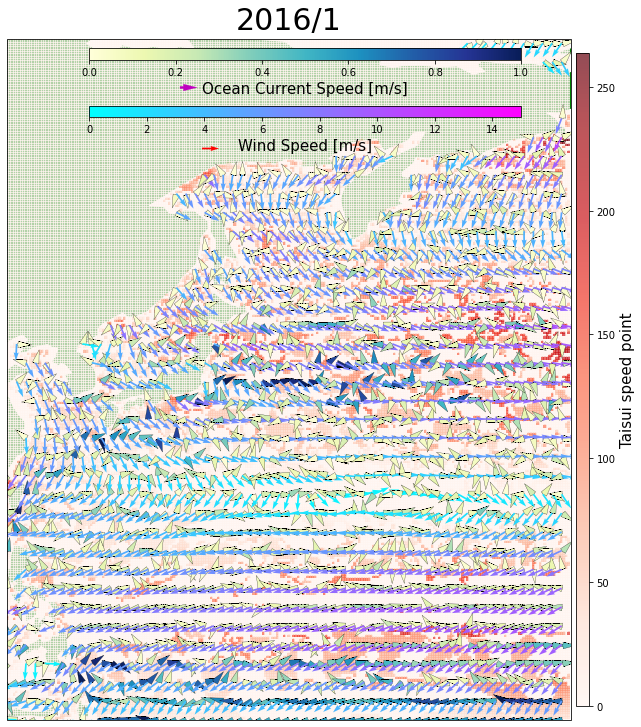

In [53]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from PIL import Image
import polars as pl
import numpy as np
import math



year = 2016
month = 1
wind_and_kairyu_data = pl.read_csv("wind&kairyu_datas/wind_and_kairyu_testdata_E180W120S0N90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")

lon = wind_and_kairyu_data[:]['LON'] # 経度データ読み込み
lat = wind_and_kairyu_data[:]['LAT'] # 緯度データ読み込み
point = wind_and_kairyu_data[:]["taisui_speed[m/s]"]

#対水速度サーモグラフ作成用行列化
list = []
for i in range(len(point)):
    list.append(point[i])

point = np.array(list)

lat_data_num = wind_and_kairyu_data.select(pl.col('LAT').n_unique())[0,0]
d_lat = (max(lat)-min(lat))/(lat_data_num-1)
lon_data_num = wind_and_kairyu_data.select(pl.col('LON').n_unique())[0,0]
d_lon = (max(lon)-min(lon))/(lon_data_num-1)

lat,lon = np.mgrid[min(lat):max(lat)+d_lat:d_lat, min(lon):max(lon)+d_lon:d_lon]
point = point.reshape([lat_data_num,lon_data_num])

#描画開始
fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し




max_p = max(list)
min_p = min(list)
c = ax.pcolor(lon,lat,point, cmap = 'Reds',alpha=0.7)
ax.add_feature(cfeature.LAND, color='g',alpha=1.0) # 陸を緑色で塗り潰す
ax.add_feature(cfeature.OCEAN, color='w') # 海を水色で塗り潰す
ax.set_extent([120, 180, 0, 70], ccrs.Geodetic())


fig.colorbar(c, ax=ax,aspect = 50, shrink=0.75, pad = 0.008).set_label('Taisui speed point',size=15) # カラーバー


wind_and_kairyu_data = pl.read_csv("wind_kairyu_draw_data/wind_and_kairyu_testdata_E180W120S0N90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")

#データサイズがでかいので分割が必要となった
lon = wind_and_kairyu_data[:]['LON'] # 経度データ読み込み
lat = wind_and_kairyu_data[:]['LAT'] # 緯度データ読み込み
wind_u = wind_and_kairyu_data[:]["wind_U_E+_W-[m/s]"]
wind_v = wind_and_kairyu_data[:]["wind_V_N+_S-[m/s]"]
kairyu_u = wind_and_kairyu_data[:]["ocean_U_E+_W-[m/s]"]
kairyu_v = wind_and_kairyu_data[:]["ocean_V_N+_S-[m/s]"]


for i in range(len(lat)):
    if not math.isnan(kairyu_u[i]):
        #海流矢印表示
        size = 10
        vec_size = (np.sqrt((kairyu_u[i])**2 + (kairyu_v[i])**2))
        Q_kairyu = ax.quiver(lon[i], lat[i], kairyu_u[i]/vec_size*size, kairyu_v[i]/vec_size*size, vec_size, linewidth = 0.25, edgecolor='black',cmap = 'YlGnBu', clim = (0,1), headlength=6 , headaxislength=6, width=.004, scale=400.)
        
        #風矢印表示
        size = 12
        vec_size = (np.sqrt((wind_u[i])**2 + (wind_v[i])**2))
        Q_wind = ax.quiver(lon[i], lat[i], wind_u[i]/vec_size*size, wind_v[i]/vec_size*size, vec_size,cmap = 'cool', clim = (0,15), width=.003, scale=400.)
        
    

#海流カラーバー表示
ax.quiverkey(Q_kairyu, 0.32, 0.93, size, '', color='m', labelsep=0.03)
cax = fig.add_axes([0.22, 0.78, 0.5, 0.01])
fig.colorbar(Q_kairyu, cax=cax, orientation="horizontal").set_label("Ocean Current Speed [m/s]",size=15)

#風カラーバー表示
ax.quiverkey(Q_wind, 0.36, 0.84, size, '', color='r', labelsep=0.03)
cax = fig.add_axes([0.22, 0.73, 0.5, 0.01])
fig.colorbar(Q_wind, cax=cax, orientation="horizontal").set_label("Wind Speed [m/s]",size=15)

#画像保存
ax.set_title(str(year) + "/" + str(month),fontsize = 30,pad = 10)
plt.savefig("kairyu_wind_taisui_fig/kairyu_wind_taisui_speed_" + str(year) + "_" + str(month) + ".png")
im = Image.open("kairyu_wind_taisui_fig/kairyu_wind_taisui_speed_" + str(year) + "_" + str(month) + ".png")

im_crop = im.crop((100, 195, 750, 930))
im_crop.save("kairyu_wind_taisui_fig/kairyu_wind_taisui_speed_" + str(year) + "_" + str(month) + ".png", quality=100)


In [52]:

im = Image.open("kairyu_wind_taisui_fig/kairyu_wind_taisui_speed_2016_1.png")
print(im.size)
im_crop = im.crop((100, 195, 750, 930))
im_crop.save('kairyu_wind_taisui_fig/test.png', quality=100)

(864, 1152)


In [ ]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from PIL import Image
import polars as pl
import numpy as np
import math


start_year = 2016
year_num = 5
for y in range(year_num):
    year = start_year + y
    for m in range(12):
        month = 1 + m

        wind_and_kairyu_data = pl.read_csv("wind&kairyu_datas/wind_and_kairyu_testdata_E180W120S0N90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")

        lon = wind_and_kairyu_data[:]['LON'] # 経度データ読み込み
        lat = wind_and_kairyu_data[:]['LAT'] # 緯度データ読み込み
        point = wind_and_kairyu_data[:]["taisui_speed[m/s]"]

        #対水速度サーモグラフ作成用行列化
        list = []
        for i in range(len(point)):
            list.append(point[i])

        point = np.array(list)

        lat_data_num = wind_and_kairyu_data.select(pl.col('LAT').n_unique())[0,0]
        d_lat = (max(lat)-min(lat))/(lat_data_num-1)
        lon_data_num = wind_and_kairyu_data.select(pl.col('LON').n_unique())[0,0]
        d_lon = (max(lon)-min(lon))/(lon_data_num-1)

        lat,lon = np.mgrid[min(lat):max(lat)+d_lat:d_lat, min(lon):max(lon)+d_lon:d_lon]
        point = point.reshape([lat_data_num,lon_data_num])

        #描画開始
        fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
        fig.patch.set_facecolor('white')
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し




        max_p = max(list)
        min_p = min(list)
        c = ax.pcolor(lon,lat,point, cmap = 'Reds',alpha=0.7)
        ax.add_feature(cfeature.LAND, color='g',alpha=1.0) # 陸を緑色で塗り潰す
        ax.add_feature(cfeature.OCEAN, color='w') # 海を水色で塗り潰す
        ax.set_extent([120, 180, 0, 70], ccrs.Geodetic())


        fig.colorbar(c, ax=ax,aspect = 50, shrink=0.75, pad = 0.008).set_label('Taisui speed point',size=15) # カラーバー


        wind_and_kairyu_data = pl.read_csv("wind_kairyu_draw_data/wind_and_kairyu_testdata_E180W120S0N90_"  + str(year) + "_" + str(month) + ".csv",encoding="shift-jis")

        #データサイズがでかいので分割が必要となった
        lon = wind_and_kairyu_data[:]['LON'] # 経度データ読み込み
        lat = wind_and_kairyu_data[:]['LAT'] # 緯度データ読み込み
        wind_u = wind_and_kairyu_data[:]["wind_U_E+_W-[m/s]"]
        wind_v = wind_and_kairyu_data[:]["wind_V_N+_S-[m/s]"]
        kairyu_u = wind_and_kairyu_data[:]["ocean_U_E+_W-[m/s]"]
        kairyu_v = wind_and_kairyu_data[:]["ocean_V_N+_S-[m/s]"]


        for i in range(len(lat)):
            if not math.isnan(kairyu_u[i]):
                #海流矢印表示
                size = 10
                vec_size = (np.sqrt((kairyu_u[i])**2 + (kairyu_v[i])**2))
                Q_kairyu = ax.quiver(lon[i], lat[i], kairyu_u[i]/vec_size*size, kairyu_v[i]/vec_size*size, vec_size, linewidth = 0.25, edgecolor='black',cmap = 'YlGnBu', clim = (0,1), headlength=6 , headaxislength=6, width=.004, scale=400.)
                
                #風矢印表示
                size = 12
                vec_size = (np.sqrt((wind_u[i])**2 + (wind_v[i])**2))
                Q_wind = ax.quiver(lon[i], lat[i], wind_u[i]/vec_size*size, wind_v[i]/vec_size*size, vec_size,cmap = 'cool', clim = (0,15), width=.003, scale=400.)
                
            

        #海流カラーバー表示
        ax.quiverkey(Q_kairyu, 0.32, 0.93, size, '', color='m', labelsep=0.03)
        cax = fig.add_axes([0.22, 0.78, 0.5, 0.01])
        fig.colorbar(Q_kairyu, cax=cax, orientation="horizontal").set_label("Ocean Current Speed [m/s]",size=15)

        #風カラーバー表示
        ax.quiverkey(Q_wind, 0.36, 0.84, size, '', color='r', labelsep=0.03)
        cax = fig.add_axes([0.22, 0.73, 0.5, 0.01])
        fig.colorbar(Q_wind, cax=cax, orientation="horizontal").set_label("Wind Speed [m/s]",size=15)


        #画像保存
        ax.set_title(str(year) + "/" + str(month),fontsize = 30,pad = 10)
        plt.savefig("kairyu_wind_taisui_fig/kairyu_wind_taisui_speed_" + str(year) + "_" + str(month) + ".png")
        im = Image.open("kairyu_wind_taisui_fig/kairyu_wind_taisui_speed_" + str(year) + "_" + str(month) + ".png")

        im_crop = im.crop((100, 195, 750, 930))
        im_crop.save("kairyu_wind_taisui_fig/kairyu_wind_taisui_speed_" + str(year) + "_" + str(month) + ".png", quality=100)


風速描画

In [ ]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import math


year = 2018
month = 1
wind_data = pl.read_csv('wind_datas/era5_testdata_E180W90S0W90_'+str(year)+'_'+str(month)+'.csv',encoding="shift-jis")

lon = wind_data[:]['LON'] # 経度データ読み込み
lat = wind_data[:]['LAT'] # 緯度データ読み込み
wind_u = wind_data[:]["U10_E+_W-[m/s]"]
wind_v = wind_data[:]["V10_N+_S-[m/s]"]


#風速サーモグラフ作成用行列化
list = []
for i in range(len(wind_u)):
    list.append(math.sqrt(wind_u[i]**2 + wind_v[i]**2))

point = np.array(list)

lat_data_num = wind_data.select(pl.col('LAT').n_unique())[0,0]
d_lat = (max(lat)-min(lat))/(lat_data_num-1)
lon_data_num = wind_data.select(pl.col('LON').n_unique())[0,0]
d_lon = (max(lon)-min(lon))/(lon_data_num-1)

lat,lon = np.mgrid[min(lat):max(lat)+d_lat:d_lat, min(lon):max(lon)+d_lon:d_lon]
point = point.reshape([lat_data_num,lon_data_num])

#描画開始
fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し

ax.set_facecolor('paleturquoise')
land_h = cfeature.NaturalEarthFeature('physical', 'land', '50m')
ax.add_feature(land_h,color='g')




max_p = max(list)
min_p = min(list)
ax.pcolor(lon,lat,point, cmap = 'Reds',alpha=0.7)

ax.set_extent([120, 180, 0, 70], ccrs.Geodetic())

風速＋風向描画

In [ ]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import math


year = 2018
month = 1
wind_data = pl.read_csv('wind_datas/era5_testdata_E180W90S0W90_'+str(year)+'_'+str(month)+'.csv',encoding="shift-jis")

#緯度経度が整数のみのデータを抽出
wind_data = wind_data.filter(pl.col("LAT") % 2 == 0)
wind_data = wind_data.filter(pl.col("LON") % 2 == 0)

lon = wind_data[:]['LON'] # 経度データ読み込み
lat = wind_data[:]['LAT'] # 緯度データ読み込み
wind_u = wind_data[:]["U10_E+_W-[m/s]"]
wind_v = wind_data[:]["V10_N+_S-[m/s]"]



#描画開始
fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し

ax.set_facecolor('paleturquoise')
land_h = cfeature.NaturalEarthFeature('physical', 'land', '50m')
ax.add_feature(land_h,color='g')

for i in range(len(lat)):
    #風矢印表示
    
    size = 14
    vec_size = (np.sqrt((wind_u[i])**2 + (wind_v[i])**2))
    Q_wind = ax.quiver(lon[i], lat[i], wind_u[i]/vec_size*size, wind_v[i]/vec_size*size, vec_size,cmap = 'Reds', clim = (0,15), width=.003, scale=400.)
    
    vec_size = 0
    



#風カラーバー表示
ax.quiverkey(Q_wind, 0.36, 0.84, size, '', color='r', labelsep=0.03)
cax = fig.add_axes([0.22, 0.73, 0.5, 0.01])
fig.colorbar(Q_wind, cax=cax, orientation="horizontal").set_label("Wind Speed [m/s]",size=15)


#画像保存
ax.set_title(str(year) + "/" + str(month),fontsize = 30,pad = 10)

ax.set_extent([120, 180, 0, 70], ccrs.Geodetic())